In [1]:
import pandas as pd

df = pd.read_csv('data/symptom_probs.csv')

,age_range,symptom_prob
0,0-9,0.40
1,10-19,0.25
2,20-29,0.37
3,30-39,0.42
4,40-49,0.51
5,50-59,0.59
6,60-69,0.72
7,70-79,0.76


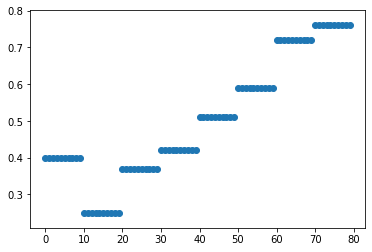

In [7]:
import matplotlib.pyplot as plt

symptom_probs = []
for i in range(80):
    symptom_probs.append(df['symptom_prob'][i // 10])
    
plt.scatter(list(range(80)), symptom_probs)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(3)
x_vals = poly.fit_transform(np.array(list(range(80))).reshape(-1, 1))

symptom_probs = np.array(symptom_probs).reshape(-1, 1)

linreg = LinearRegression().fit(x_vals, symptom_probs)
linreg_preds = linreg.predict(x_vals)
linreg_score = linreg.score(x_vals, symptom_probs)

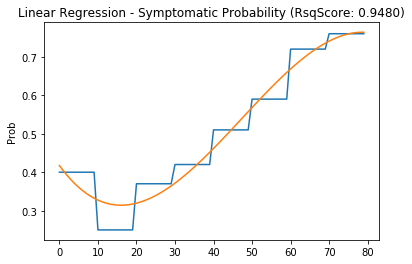

In [14]:
plt.plot(symptom_probs[:, 0])
plt.plot(linreg_preds[:, 0])
plt.title('Linear Regression - Symptomatic Probability (RsqScore: %.4f)' % linreg_score)
plt.ylabel('Prob')
plt.show()